In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = ['AAPL'], start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,19.606428,19.714287,19.535713,19.714287,16.711407,407282400
2012-03-13,19.912144,20.292143,19.848213,20.289286,17.198818,690855200
2012-03-14,20.644644,21.240000,20.549999,21.056429,17.849108,1418844000
2012-03-15,21.414642,21.428928,20.662500,20.912857,17.727406,1159718000
2012-03-16,20.882856,21.042856,20.642857,20.913214,17.727709,825487600
2012-03-19,21.370358,21.491785,21.037500,21.467857,18.197872,901236000
2012-03-20,21.411072,21.674999,21.124287,21.641430,18.344994,816662000
2012-03-21,21.526428,21.773214,21.478930,21.517857,18.240252,644042000
2012-03-22,21.349285,21.589287,21.268929,21.405001,18.144588,623870800


In [2]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

# data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)

# Target column Categories
# data['y'] =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
data['yi'] = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
print(len(yi))

data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

[0.6571445465087891, -0.0053577423095703125, -0.08607101440429688, -0.5149993896484375, 0.1521434783935547, 0.2482147216796875, 0.7574996948242188, -0.7717857360839844, 0.6299991607666016, 0.1646442413330078, 0.37357139587402344, 0.19392776489257812, -0.015714645385742188, 0.05999946594238281, 0.6817855834960938, -0.03928565979003906, 0.26357269287109375, 0.5657138824462891, 0.8171424865722656, -0.23714256286621094, 0.4042854309082031, -0.1424999237060547, 0.3078575134277344, 0.4253578186035156, -0.08857154846191406, -0.8935718536376953, 0.39285850524902344, 0.09107208251953125, -0.15464210510253906, -0.486785888671875, 0.17035675048828125, -0.2025012969970703, 0.0307159423828125, 0.053928375244140625, 0.2664299011230469, 0.21249961853027344, 1.075714111328125, -0.6535720825195312, 0.7196426391601562, -0.17214393615722656, -0.057857513427734375, 0.3132133483886719, 0.052143096923828125, 0.17714309692382812, -0.35357093811035156, -0.3178577423095703, 0.18428611755371094, 0.2953567504882

In [18]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,23.089287,23.114286,22.432142,19.096912,35.875684,23.552655,22.673908,21.845652,-3.338417,0,19.145868
1,22.484285,22.692142,22.332144,19.145868,36.765282,23.451416,22.670259,21.854182,-3.284521,0,19.299408
2,22.583929,22.683214,22.280357,19.299408,39.582099,23.376995,22.670254,21.864988,-2.935408,0,19.756378
3,22.691786,23.225000,22.535713,19.756378,47.096862,23.360785,22.680879,21.882760,-3.575035,0,19.598894
4,23.173929,23.313929,23.000000,19.598894,45.028756,23.328499,22.687629,21.897846,-3.607548,0,19.234953
5,22.842501,22.930714,22.500000,19.234953,40.613280,23.258574,22.685781,21.907071,-3.995768,0,18.541733
6,22.537500,22.563213,21.772142,18.541733,33.841003,23.117758,22.667845,21.905388,-2.594929,0,19.277214
7,21.872143,22.692142,21.812857,19.277214,44.383315,23.072631,22.667371,21.915170,-3.886953,0,18.648760
8,22.535713,22.639286,21.846430,18.648760,38.732730,22.961496,22.652289,21.915044,-3.440025,0,18.754261
9,22.194286,22.376785,21.808571,18.754261,40.104305,22.872748,22.639959,21.916562,-3.610241,0,18.532616


AttributeError: 'DataFrame' object has no attribute 'Close'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.02295817 0.02294337 0.02477161 ... 0.61254467 0.         0.02075971]
 [0.02213767 0.02137597 0.02261574 ... 0.64462357 1.         0.02403152]
 [0.02073185 0.02207898 0.02294016 ... 0.6473474  1.         0.02829634]
 ...
 [0.70292872 0.70530315 0.68624737 ... 0.63741923 1.         0.71234811]
 [0.71004135 0.71485848 0.70603747 ... 0.72379951 1.         0.73006085]
 [0.7151577  0.72731964 0.71872676 ... 0.62397837 1.         0.72869667]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30 # Number of days want to look back
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# make sure the shape is correct
#print(X)
print(X.shape)
#print(y)
print(y.shape)

2448
(2418, 30, 8)
(2418, 1)


In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1934
(1934, 30, 8)
(484, 30, 8)
(1934, 1)
(484, 1)
[[0.01673005]
 [0.01859073]
 [0.01876841]
 ...
 [0.56623563]
 [0.569612  ]
 [0.57616078]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
116/116 [==============================] - 2s 10ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 2/30
116/116 [==============================] - 1s 9ms/step - loss: 1.0784e-04 - val_loss: 0.0013
Epoch 3/30
116/116 [==============================] - 1s 10ms/step - loss: 9.5098e-05 - val_loss: 0.0013
Epoch 4/30
116/116 [==============================] - 1s 10ms/step - loss: 8.8830e-05 - val_loss: 0.0013
Epoch 5/30
116/116 [==============================] - 1s 9ms/step - loss: 8.7074e-05 - val_loss: 0.0012
Epoch 6/30
116/116 [==============================] - 1s 9ms/step - loss: 9.5754e-05 - val_loss: 0.0012
Epoch 7/30
116/116 [==============================] - 1s 9ms/step - loss: 8.3337e-05 - val_loss: 0.0012
Epoch 8/30
116/116 [==============================] - 1s 9ms/step - loss: 8.9155e-05 - val_loss: 0.0011
Epoch 9/30
116/116 [==============================] - 1s 9ms/step - loss: 7.6414e-05 - val_loss: 0.0011
Epoch 10/30
116/116 [==============================] - 1s 9ms/ste

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 0s 3ms/step
[0.55711514] [0.58137683]
[0.56265974] [0.58120438]
[0.56754667] [0.58292916]
[0.5696438] [0.57508415]
[0.5719937] [0.58856329]
[0.5669091] [0.58750759]
[0.5737209] [0.5871156]
[0.5762665] [0.59118701]
[0.57759833] [0.59328809]
[0.5811364] [0.58867832]


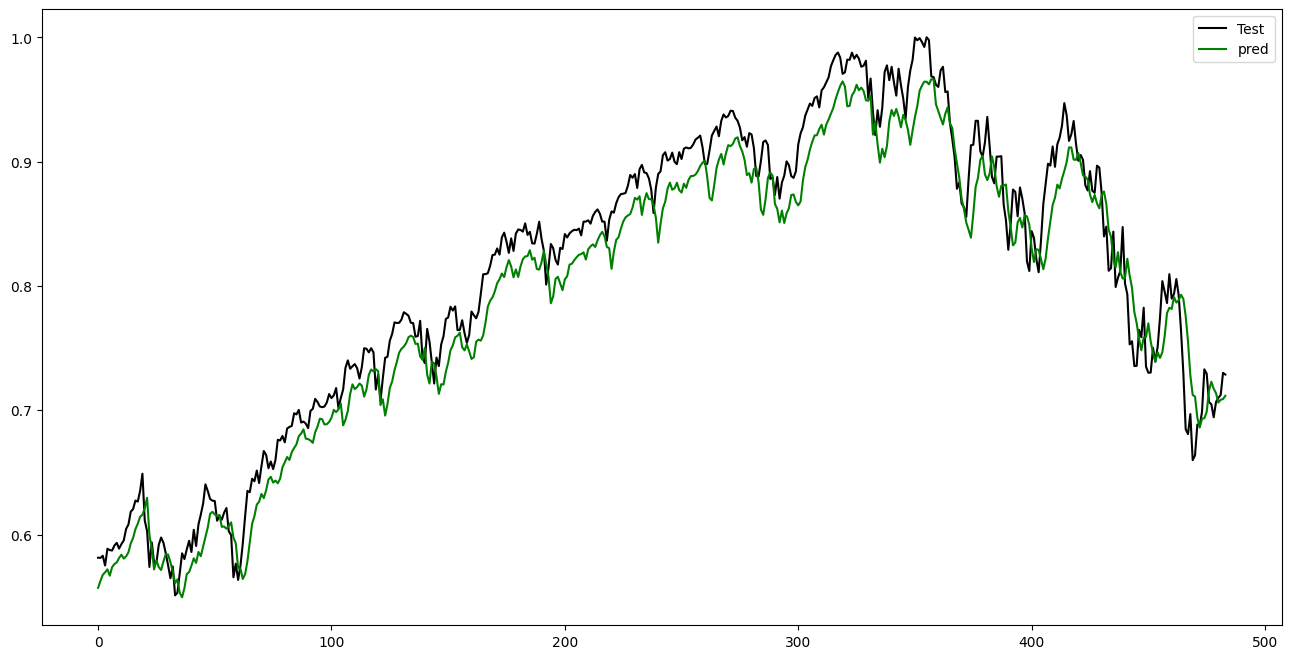

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()